In [44]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()


print(iris.DESCR)
print(iris.data)
print(iris.target)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [14]:
iris_dic = {"Sepal Length":iris.data[:,0], "Sepal Width":iris.data[:,1], "Petal Length":iris.data[:,2], "Petal Width":iris.data[:,3], "Class":iris.target}


iris_df = pd.DataFrame(iris_dic)

iris_df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


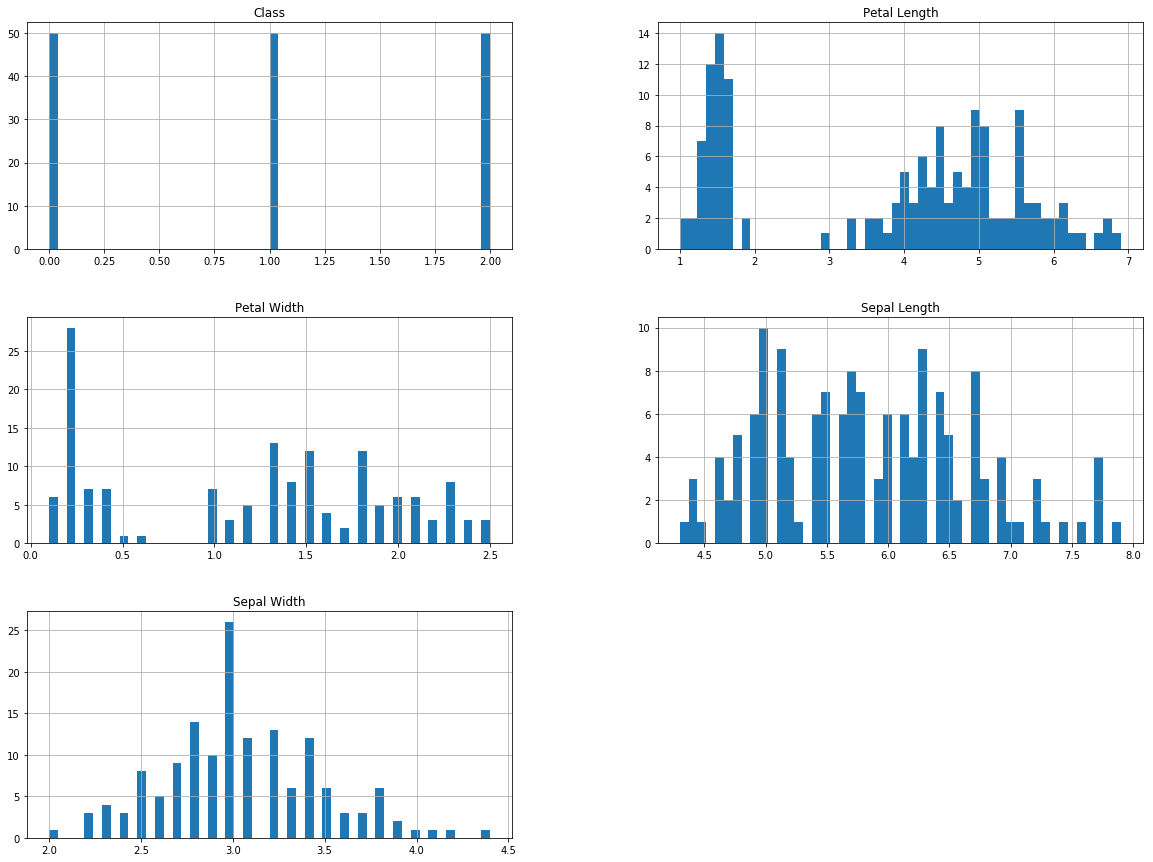

In [21]:
iris_df.hist(bins=50, figsize=(20,15))
plt.show()


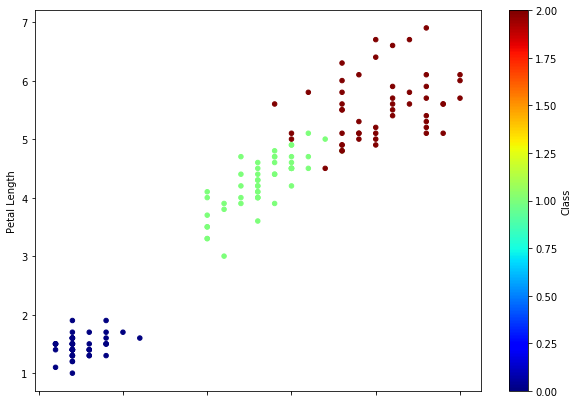

In [28]:
iris_df.plot(kind="scatter", x="Petal Width", y="Petal Length", figsize=(10,7), c="Class", cmap=plt.get_cmap("jet"), colorbar=True)


In [52]:
def split_train_n_test(data, ratio):
    shuffled_indices = np.random.permutation(len(data))
    train_size = int(len(data) * ratio)
    train_index = shuffled_indices[:train_size]
    test_index = shuffled_indices[train_size:]
    return data.iloc[train_index], data.iloc[test_index]

train_set, test_set = split_train_n_test(iris_df, 0.8)

print(len(train_set), "train +", len(test_set), "test")

X_train = train_set.values[:,:3]
Y_train = train_set.values[:,4]
Y_train_1 = (Y_train == 2)
X_test  = test_set.values[:,:3]
Y_test  = test_set.values[:,4]
Y_test_1  = (Y_test == 2)



120 train + 30 test


In [62]:
## SGD 1

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict

sgd_clf_1 = SGDClassifier()

Y_train_pred = cross_val_predict(sgd_clf_1, X_train, Y_train_1, cv=3)

sgd_clf_1.fit(X_train, Y_train_1)
Y_test_pred = sgd_clf_1.predict(X_test)

train_correct = sum(Y_train_pred == Y_train_1)
test_correct = sum(Y_test_pred == Y_test_1)

print("Correct train :", train_correct, "\t Incorrect train :", len(X_train)- train_correct)
print("Correct test :", test_correct, "\t Incorrect test :", len(X_test)- test_correct)

Correct train : 86 	 Incorrect train : 34
Correct test : 23 	 Incorrect test : 7


/usr/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/lib/python3.6/site-packages/sklearn/linear_mode

In [64]:
from sklearn.metrics import precision_score, recall_score

pre_train = precision_score(Y_train_1, Y_train_pred)
rec_train = recall_score(Y_train_1, Y_train_pred)
pre_test = precision_score(Y_test_1, Y_test_pred)
rec_test = recall_score(Y_test_1, Y_test_pred)

print("Precision Train :", pre_train, "Recall Train :", rec_train)
print("Precision Test :", pre_test, "Recall Test :", rec_test)


from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_train_1, Y_train_pred))


Precision Train : 0.5238095238095238 Recall Train : 0.3142857142857143
Precision Test : 1.0 Recall Test : 0.5333333333333333
[[75 10]
 [24 11]]


In [79]:
## SGQ OvA

sgd_clf = SGDClassifier()

Y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train, cv=3)

sgd_clf.fit(X_train, Y_train)
Y_test_pred = sgd_clf.predict(X_test)

train_correct = sum(sgd_clf.predict(X_train) == Y_train)
test_correct = sum(sgd_clf.predict(X_test) == Y_test)

print("Correct train :", train_correct, "\t Incorrect train :", len(X_train)- train_correct)
print("Correct test :", test_correct, "\t Incorrect test :", len(X_test)- test_correct)

model = sgd_clf

Correct train : 91 	 Incorrect train : 29
Correct test : 24 	 Incorrect test : 6


/usr/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/lib/python3.6/site-packages/sklearn/linear_mode

In [80]:
from sklearn.metrics import precision_score, recall_score

pre_train = precision_score(Y_train, Y_train_pred, average='weighted')
rec_train = recall_score(Y_train, Y_train_pred, average='weighted')
pre_test = precision_score(Y_test, Y_test_pred, average='weighted')
rec_test = recall_score(Y_test, Y_test_pred, average='weighted')

print("Precision Train :", pre_train, "Recall Train :", rec_train)
print("Precision Test :", pre_test, "Recall Test :", rec_test)


from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_train, Y_train_pred))

Precision Train : 0.464469696969697 Recall Train : 0.475
Precision Test : 0.8466666666666666 Recall Test : 0.8
[[31 12  0]
 [15 14 13]
 [ 9 14 12]]


/usr/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/lib/python3.6/site-packages/sklearn/linear_mode

ValueError: multiclass format is not supported

In [76]:
## Random Forest

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

Y_train_pred = cross_val_predict(forest_clf, X_train, Y_train, cv=3)

forest_clf.fit(X_train, Y_train)
Y_test_pred = forest_clf.predict(X_test)

train_correct = sum(sgd_clf.predict(X_train) == Y_train)
test_correct = sum(sgd_clf.predict(X_test) == Y_test)

print("Correct train :", train_correct, "\t Incorrect train :", len(X_train)- train_correct)
print("Correct test :", test_correct, "\t Incorrect test :", len(X_test)- test_correct)




Correct train : 83 	 Incorrect train : 37
Correct test : 15 	 Incorrect test : 15


In [77]:
from sklearn.metrics import precision_score, recall_score

pre_train = precision_score(Y_train, Y_train_pred, average='weighted')
rec_train = recall_score(Y_train, Y_train_pred, average='weighted')
pre_test = precision_score(Y_test, Y_test_pred, average='weighted')
rec_test = recall_score(Y_test, Y_test_pred, average='weighted')

print("Precision Train :", pre_train, "Recall Train :", rec_train)
print("Precision Test :", pre_test, "Recall Test :", rec_test)


from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_train, Y_train_pred))



Precision Train : 0.8915526675786593 Recall Train : 0.8916666666666667
Precision Test : 0.9272727272727274 Recall Test : 0.9
[[43  0  0]
 [ 0 36  6]
 [ 0  7 28]]


AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'